## Initialize session

In [11]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np
import matplotlib.pyplot as plt

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Fig 8.1

In [1]:
# create a set of stars from 1 solar to 7 solar mass 
massZAMS = [1,2,4,6,8]
stars = []

# set metallicity
Z = 0.02

for i in range(len(massZAMS)):
    stars.append(ms.star_log(mass=massZAMS[i],Z=Z))

NameError: name 'ms' is not defined

## HRD 

<IPython.core.display.Javascript object>


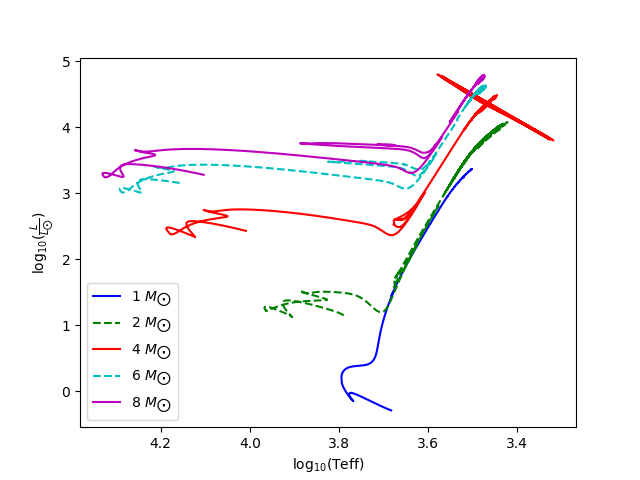

In [3]:
# get the luminosity and surface temperatures of every star
luminosity = []
surfTemperature = []

for i in range(len(massZAMS)):
    luminosity.append(stars[i].get('log_L'))
    surfTemperature.append(stars[i].get('log_Teff'))
    
    # find when first thermal pulsing ends and add a bit more
    thermal_pulse = stars[i].find_first_TP()
    thermal_pulse = thermal_pulse + int(0.05* len(luminosity))
    
    # find start of main sequence by largest log_dt
    time_steps = stars[i].get('log_dt')
    start = np.argmax(time_steps) - int(0.2 * np.argmax(time_steps))
    
    # find the end of the main sequence
    end = np.argmin(time_steps[start:(len(time_steps) - int(0.2*len(time_steps)))])
                    
    # slice this array to not include after thermal pulsing
    luminosity[i] = luminosity[i][start:end]
    surfTemperature[i] = surfTemperature[i][start:end]
    
    
# Create the plot 
plt.figure(1)

# plot labels
colour = ['b-','g--','r-','c--','m-']#,'k--']'--b>']

# legend labels
legend = []

for i in range(len(luminosity)):
    legend.append(str(massZAMS[i]) + r" $M_{\bigodot}$")
    
# plot each luminosity
for i in range(len(luminosity)):
    plt.plot(surfTemperature[i],luminosity[i],colour[i],markevery=10,label=legend[i])

# other plot features
gca().invert_xaxis()
xlabel('log$_{10}$(Teff)')
ylabel(r"log$_{10}(\frac{L}{L_{\bigodot}})$")
plt.legend()

## Radius and Effective Surface Temperature

<IPython.core.display.Javascript object>


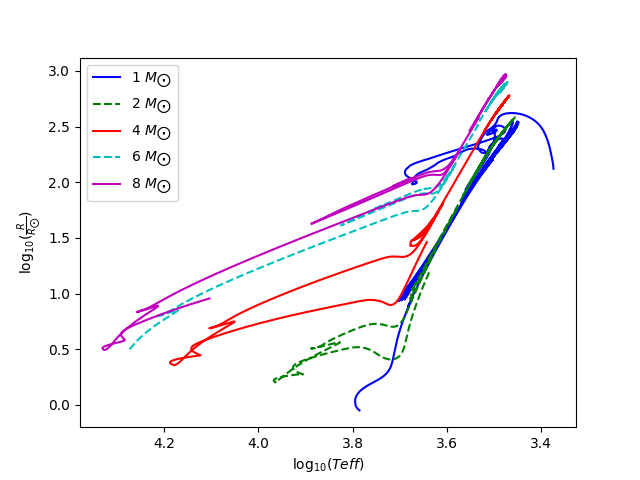

In [4]:
# grab the appropriate central temperatures and radii
surface_temp = []
radius = []

for i in range(len(massZAMS)):
    
    # get the values and slice 
    temp_list = stars[i].get('log_Teff')
    radius_list = stars[i].get('log_R')
    
    surface_temp.append(temp_list[start:end])
    radius.append(radius_list[start:end])
    

# Create plot
plt.figure(2)

# plot
for i in range(len(massZAMS)):
    plt.plot(surface_temp[i],radius[i],colour[i],label=legend[i])
    
# other plot features
gca().invert_xaxis()
plt.xlabel(r"log$_{10}(Teff)$")
plt.ylabel(r"log$_{10}(\frac{R}{R_{\bigodot}})$")
plt.legend()

## Central Temperature and Density

In [5]:
# get the central temperature and density
central_temp = []
central_density = []
central_mu = []

for i in range(len(massZAMS)):
    temp_list = stars[i].get('log_center_T')
    density_list = stars[i].get('log_center_Rho')
    mu_list = stars[i].get('center_mu')
    
    central_temp.append(temp_list[start:end])
    central_density.append(density_list[start:end])
    central_mu.append(mu_list[start])

## Determine When $P_{ideal}$ = $P_{rad}$ and $P_{ideal}$ = $P_{degen}$

<IPython.core.display.Javascript object>


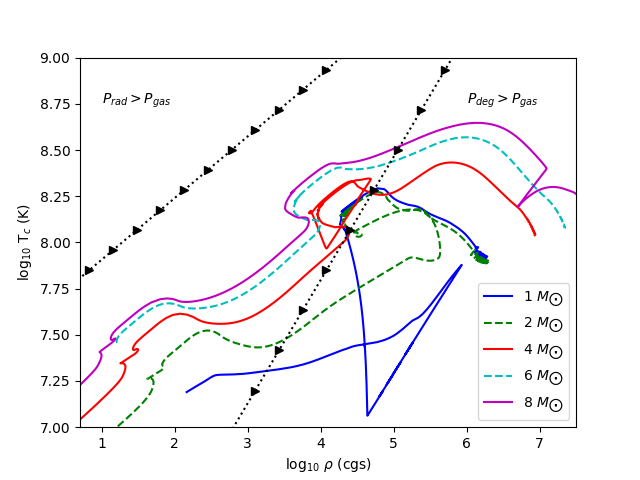

In [9]:
###### constants
a = 5.65e-16
mpr = 1.67e-27
me = 9.1e-31
hbar = 1.05e-34
k = 1.38e-23

def ideal_rad(log_Rhoc,mu):
    
    # convert cgs to SI
    log_Rhoc = np.log10(10**(log_Rhoc) * 100**3 / 1000.0)
    
    return log_Rhoc / 3. + np.log10(3. * k  / (a * mu * mpr)) / 3.

def ideal_degen(log_Rhoc,mu):
    
    # convert cgs to SI
    log_Rhoc = np.log10(10**(log_Rhoc) * 100**3 / 1000.0)
    
    # constant in front
    alpha = (np.pi**3 * hbar**2 * (3/np.pi)**(5/3.)) / (15. * me)
    
    return (2/3.) * log_Rhoc - (2/3.)*np.log10((mu * mpr) ) + np.log10(alpha / k)

# create plot
plt.figure()

# plot for each star
for i in range(len(massZAMS)):
    plt.plot(central_density[i],central_temp[i],colour[i],label=legend[i])

# add the limits of degen and rad pressure
rho = np.linspace(0.5,7,1000)

plt.plot(rho,ideal_rad(rho,central_mu[0]),':k>',markevery=50)
plt.plot(rho,ideal_degen(rho,central_mu[0]),':k>',markevery=50)

# set the y and x limits
plt.ylim([7,9])
plt.xlim([0.7,7.5])

# set the labels
plt.xlabel(r"log$_{10}$ $\rho$ (cgs)")
plt.ylabel(r"log$_{10}$ T$_{c}$ (K)")
plt.legend()

# get axes and add text
ax = plt.gca()

ax.text(1,8.75,r"$P_{rad} > P_{gas}$")
ax.text(6,8.75,r"$P_{deg} > P_{gas}$")